In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Engine parameters
bore = 0.08          # Bore (m)
stroke = 0.09        # Stroke (m)
conn_rod_len = 0.14  # Connecting rod length (m)
rpm = 2000           # Engine speed (rpm)
mass_rec = 0.5       # Reciprocating mass (kg)
mass_rot = 2.5       # Rotating mass (kg)
radius = stroke / 2  # Crank radius (m)
n_cycles = 5        # Number of cycles to simulate

In [ ]:
# Flywheel parameters
flywheel_inertia = 0.05  # Flywheel moment of inertia (kg-m^2)
eccentric_mass = 0.1    # Eccentric mass (kg)
eccentric_distance = 1  # Distance of eccentric mass from center (m)

In [ ]:
# Simulation parameters
t_step = 0.0001  # Time step (s)
theta_step = 2 * np.pi / 1000  # Crank angle step (rad)
time = np.arange(0, n_cycles * 2 * np.pi / (rpm / 60) + t_step, t_step)  # Time array

In [ ]:
# Compute engine constants
V_disp = np.pi * bore**2 * stroke / 4  # Displaced volume (m^3)
r_cr = conn_rod_len / radius  # Connecting rod ratio
omega = rpm * 2 * np.pi / 60  # Angular velocity (rad/s)

In [ ]:
# Initialize arrays
theta = np.arange(0, 2 * np.pi * n_cycles + theta_step, theta_step)  # Crank angle array
speed_no_flywheel = np.zeros_like(time)  # Speed without flywheel
speed_with_flywheel = np.zeros_like(time)  # Speed with flywheel
unbalanced_force = np.zeros_like(theta)  # Unbalanced force

In [ ]:
# Compute unbalanced force and speed fluctuation
for i in range(len(time)):
    theta_idx = int(np.mod(np.floor(time[i] * omega / theta_step), len(theta)))
    theta_curr = theta[theta_idx]
    sin_theta = np.sin(theta_curr)
    cos_theta = np.cos(theta_curr)

    # Compute unbalanced force due to reciprocating mass and eccentric mass
    unbalanced_force_rec = mass_rec * radius * omega**2 * (cos_theta + cos_theta / r_cr)
    unbalanced_force_ecc = eccentric_mass * eccentric_distance * omega**2 * np.cos(theta_curr)
    unbalanced_force[theta_idx] = unbalanced_force_rec + unbalanced_force_ecc

    # Compute speed without flywheel
    speed_no_flywheel[i] = omega * (1 + cos_theta / r_cr)

    # Compute speed with flywheel
    angular_accel = unbalanced_force[theta_idx] * radius / (mass_rot * radius**2 + flywheel_inertia)
    if i > 0:
        speed_with_flywheel[i] = speed_with_flywheel[i-1] + angular_accel * t_step
    else:
        speed_with_flywheel[i] = omega


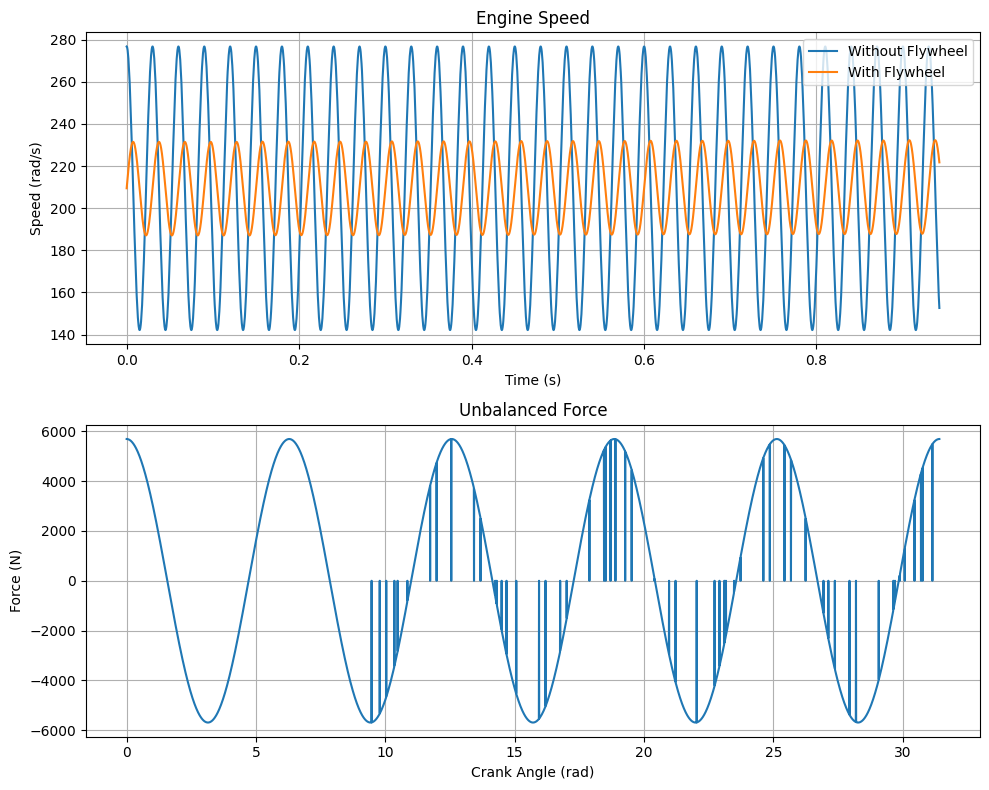

In [ ]:
# Plot results
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(time, speed_no_flywheel, label='Without Flywheel')
plt.plot(time, speed_with_flywheel, label='With Flywheel')
plt.title('Engine Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (rad/s)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(theta, unbalanced_force)
plt.title('Unbalanced Force')
plt.xlabel('Crank Angle (rad)')
plt.ylabel('Force (N)')
plt.grid(True)

plt.tight_layout()
plt.show()